<a href="https://colab.research.google.com/github/CrAvila/EMALCA-El-Salvador-2023/blob/main/EMALCA_SV_2023_Data_Science_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EMALCA El Salvador 2023**

## **Introduction to data science**

### Homework 1

#### Carlos Ávila

1. *(Parameters fluctuations)* Repeat the experiment we have seen in class. That is, suppose that the true relationship between two variables is:

\begin{align}
  Y = \beta_0 + \beta_1 X + \epsilon\;, \text{ with } ϵ \sim \mathcal{N}(0,\sigma^2)
\end{align}

with $\beta_0 = 3$, $\beta_1 = 5$, and $\sigma^2 = 4$, for instance. Now:

(a) perform$N_{exp}$ experiments (e.g $N_{exp} = 50, 100 \dots$), and, for each experiment, construct a table with $\{(X_i, Y_i)\}_{i=1}^N$ data points ($N$ fixed), sampled from Eq. (1). Fit the model using the estimatos $\hat{\beta}_{0,1}$ obtained with the least square method. Calculate the empirical mean and standard deviations of $\hat{\beta}_{0,1}$ and compare with the true coefficients $(\beta_{0}) = 3, \beta_{1} = 5$. Visualize the fluctuations of the estimated model as we did in class.

In [1]:
!pip install numpy
!pip install matplotlib

In [2]:
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import os
import random
import time
import sys
from matplotlib import rcParams
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

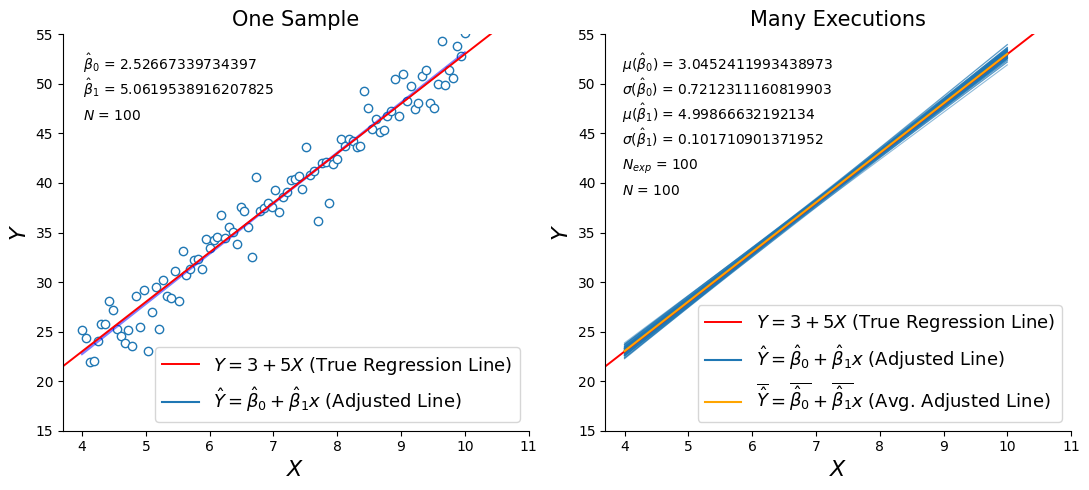

In [3]:
# Number of Experiments
n_exp = 100

# Number of samples in each experiment
N = 100

# Variance
v = 4

# Interval
a = 4
b = 10

# Parameters of Y = beta_0 + beta_1*X

beta_0 = 3
beta_1 = 5

beta_0_list = []
beta_1_list = []

# Domain
X = np.linspace(a,b, N)
Y = []

# x for plotting
x = np.linspace(np.min(X), np.max(X), 100)
y_model = []
y_model_beta_0, y_model_beta_1 = None, None

# Axes for plotting
fig = plt.figure(figsize=(11,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


for exp in range(n_exp):

    epsilon = np.random.normal(0,sqrt(v),N)


    # Real relationship of the data
    Y = beta_0 + beta_1*X + epsilon

    # Linear Regression
    fit = stats.linregress(X,Y)

    # y for plotting
    y_model = fit.intercept + fit.slope*x
    y_model_beta_0, y_model_beta_1 =  fit.intercept, fit.slope

    # Saving current parameters
    beta_0_list.append(fit.intercept)
    beta_1_list.append(fit.slope)

    # Plotting
    ax2.plot(x,y_model, "-", color="C0", linewidth=0.8, alpha=0.5)
    ax2.set_xlabel(r'$X$', fontsize=16)
    ax2.set_ylabel(r'$Y$', fontsize=16)

# Real Line
x_real = np.linspace(-2 + a, b + 2, 100)
y_real = beta_0 + beta_1*x_real

# One example
ax1.set_title(r'One Sample', fontsize=15)
ax1.plot(X, Y, 'o',  markerfacecolor='white')
ax1.plot(x, y_model, '-', color='b', linewidth=2, alpha=0.5)

ax1.set_xlabel(r'$X$', fontsize=16)
ax1.set_ylabel(r'$Y$', fontsize=16)

plt.sca(ax1)
ax1.plot(x_real, y_real, '-', color='red', linewidth=1.4, label=r'$Y = 3 + 5X$ (True Regression Line)')
ax1.plot([],[], '-', color='C0', label=r'$\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 x$ (Adjusted Line)')
ax1_legend_1 = plt.legend(loc='lower right', fontsize=13)

# Ax2 setup

plt.sca(ax2)
ax2.set_title(r'Many Executions', fontsize=15)

avg_beta_0 = np.mean(beta_0_list)
avg_beta_1 = np.mean(beta_1_list)

ax2.plot(x_real, y_real, '-', color='red', linewidth=1.4, label=r'$Y = 3 + 5X$ (True Regression Line)')
ax2.plot([],[], '-', color='C0', label=r'$\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 x$ (Adjusted Line)')
ax2.plot(x,avg_beta_0 + avg_beta_1*x, '-', color='orange', label=r'$\overline{\hat{Y}} = \overline{\hat{\beta}_0} + \overline{\hat{\beta}_1} x$ (Avg. Adjusted Line)')




plt.figtext((8)/100, (85)/100, r"$\hat{\beta}_0}$" + f" = {y_model_beta_0} ")
plt.figtext((8)/100, (80)/100, r"$\hat{\beta}_1}$" + f" = {y_model_beta_1}")
plt.figtext((8)/100, (75)/100, r"$N$" + f" = {N} ")

plt.figtext((57)/100, (85)/100, r"$\mu({\hat{\beta}_0})$" + f" = {avg_beta_0} ")
plt.figtext((57)/100, (80)/100, r"$\sigma(\hat{\beta}_0}$" + f") = {np.std(beta_0_list)} ")
plt.figtext((57)/100, (75)/100, r"$\mu({\hat{\beta}_1})$" + f" = {avg_beta_1}")
plt.figtext((57)/100, (70)/100, r"$\sigma(\hat{\beta}_1}$" + f") = {np.std(beta_1_list)} ")
plt.figtext((57)/100, (65)/100, r"$N_{exp}$" + f" = {n_exp} ")
plt.figtext((57)/100, (60)/100, r"$N$" + f" = {N} ")

ax2_legend_1 = plt.legend(loc='lower right', fontsize=13)


# Show plots
for ax in fig.get_axes():
  ax.set_xlim([3.7,11])
  ax.set_ylim([15,55])

  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)


plt.tight_layout()
plt.show()

(b) *(Dependence on the number of sampled points)* As in (a), estimate the coefficients $B_{0,1}$ using the least square equations, but now, in each experiment, change the number of sampled points $N$. Plot the estimated parameters $\hat{\beta}_{0,1}$ as a function of the number $N$. Discuss your findings. *Hint:* In order to have more robust results, perform many realizations for a fixed $N$.

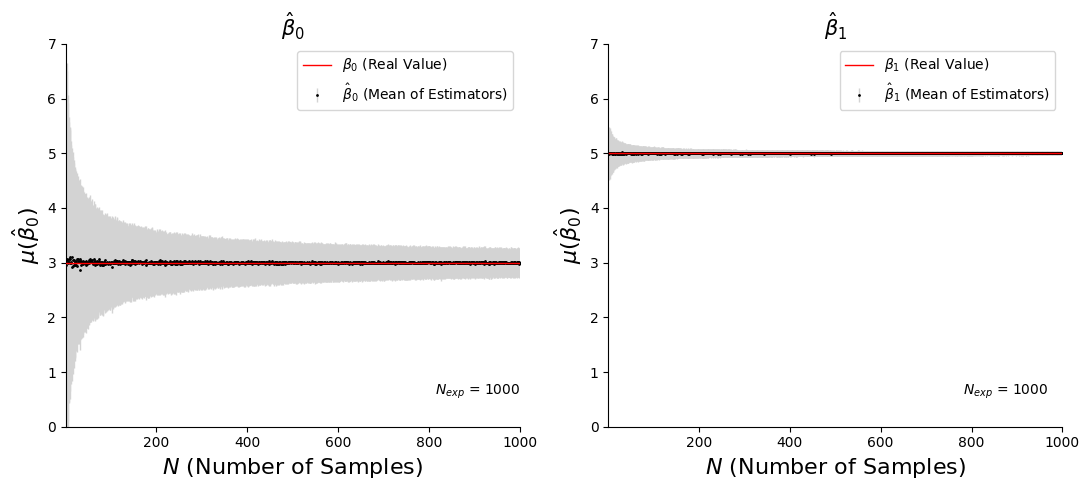

In [15]:
# Number of Iterations
# Number of fixed experiments per iteration
# Maximum numbr of samples (starting from 2)
N = 1000
n_exp = 1000

# Variance
v = 4

# Interval
a = 4
b = 10

# Parameters of Y = beta_0 + beta_1*X

beta_0 = 3
beta_1 = 5

# Domain
X = []
Y = []

# n for plotting
n = []
beta_0_means = []
beta_0_std_list = []
beta_1_means = []
beta_1_std_list = []


# Axes for plotting
fig2 = plt.figure(figsize=(11,5))
ax3 = fig2.add_subplot(121)
ax4 = fig2.add_subplot(122)


for s in range(2, N + 1):
    local_beta_0_list = []
    local_beta_1_list = []

    n.append(s)

    for i in range(n_exp):
      epsilon = np.random.normal(0,sqrt(v),s)

      # Real relationship of the data
      X = np.linspace(a,b, s)
      Y = beta_0 + beta_1*X + epsilon

      # Linear Regression
      fit = stats.linregress(X,Y)

      # y for plotting

        # Saving current parameters
      local_beta_0_list.append(fit.intercept)
      local_beta_1_list.append(fit.slope)

    beta_0_means.append(np.mean(local_beta_0_list))
    beta_0_std_list.append(np.std(local_beta_0_list))

    beta_1_means.append(np.mean(local_beta_1_list))
    beta_1_std_list.append(np.std(local_beta_1_list))


# Plotting
plt.sca(ax3)
ax3.set_title(r'$\hat{\beta}_0$', fontsize=15)

@np.vectorize
def b0(x):
    return beta_0

@np.vectorize
def b1(x):
    return beta_1

ax3.errorbar(n,  beta_0_means, yerr=beta_0_std_list, fmt='o', color='black', ecolor='lightgray', elinewidth=1, capsize=0, markersize=1, label=r'$\hat{\beta}_0$ (Mean of Estimators)');
ax3.plot(n, b0(n), '-', color='r', linewidth=1, label=r'$\beta_0$ (Real Value)', zorder=10)

ax3.set_xlabel(r'$N$ (Number of Samples)', fontsize=16)
ax3.set_ylabel(r'$\mu({\hat{\beta}_0})$', fontsize=16)



# Beta_1
plt.sca(ax4)
ax4.set_title(r'$\hat{\beta}_1$', fontsize=15)

ax4.errorbar(n,  beta_1_means, yerr=beta_1_std_list, fmt='o', color='black', ecolor='lightgray', elinewidth=1, capsize=0, markersize=1, label=r'$\hat{\beta}_1$ (Mean of Estimators)');
ax4.plot(n, b1(n), '-', color='r', linewidth=1, label=r'$\beta_1$ (Real Value)', zorder=10)

ax4.set_xlabel(r'$N$ (Number of Samples)', fontsize=16)
ax4.set_ylabel(r'$\mu({\hat{\beta}_0})$', fontsize=16)

# Show plots
for ax in fig2.get_axes():
  ax.set_xlim([1, N])
  ax.set_ylim([0,7])
  ax.legend()

  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)


plt.figtext((40)/100, (20)/100, r"$N_{exp} $" + f" = {n_exp} ")
plt.figtext((88)/100, (20)/100, r"$N_{exp} $" + f" = {n_exp} ")

plt.tight_layout()
plt.show()


We can appreciate how, even though using a great amount of samples doesn't make a remarkable difference in the mean of the parameters, the more samples we use, the standard deviation slowly decreases, but not as much as one would expect.

2. *(Duncan dataset)* Fit a linear regression model using the Duncan dataset seen in class: explain income in terms of the variable education. If you are using the `statsmodel` in Python, explain the output obtained with `results.summary()`.

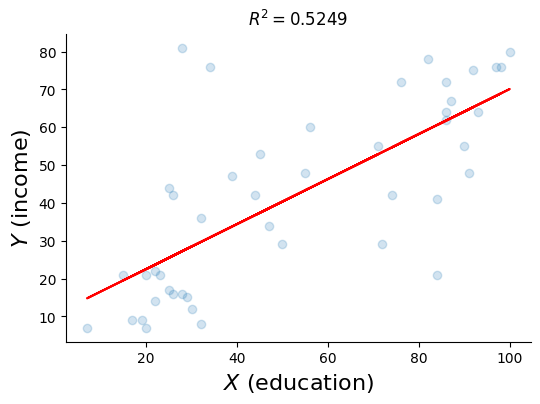



Summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     47.51
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           1.84e-08
Time:                        15:46:10   Log-Likelihood:                -190.42
No. Observations:                  45   AIC:                             384.8
Df Residuals:                      43   BIC:                             388.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6035      5.198      2.040      0.048       0.120      21.087
education      0.5949      0.086      6.893      0.000       0.421       0.769
==============================================================================
Omnibus:                        9.841   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.609
Skew:                           0.776   Prob(JB):                      0.00497
Kurtosis:                       4.802   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
duncan_prestige = sm.datasets.get_rdataset("Duncan", "carData")
Y = duncan_prestige.data['income']
X = duncan_prestige.data['education']
X = sm.add_constant(X)# adding a constant to adjust the model beta0 + beta1 * X.
                      # the constant 1 corresponds to the term beta0*1.

duncan_prestige.data

df = duncan_prestige.data
df.to_csv('duncan_dataset.csv')

model = sm.OLS(Y,X)
results = model.fit()
model_prediction = results.predict(X[['const','education']])

results.rsquared

fig3 = plt.figure(figsize=(6,4))


plt.plot(X['education'],Y,'o',color='C0',alpha=0.2,label=r'Dados')
plt.plot(X['education'],model_prediction,'r-')
plt.xlabel(r'$X$ (education)',fontsize=16)
plt.ylabel(r'$Y$ (income)',fontsize=16)
plt.title(r'$R^2 ='+str(np.round(results.rsquared,4))+'$')

for ax in fig3.get_axes():

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.show()

print()
print()
print(r'Summary:')

results.summary()

The R-squared value is a measure of how well the model fits the data. A value of $1$ indicates that the model perfectly fits the data, while a value of $0$ indicates that the model does not fit the data at all. The adjusted R-squared value is a more accurate measure of fit than the R-squared value, as it takes into account the number of independent variables in the model. The R-squared value $(0.525)$ indicates that approximately $52.5$% of the variability in the dependent variable (income) can be explained by the independent variable (education). The adjusted R-squared value $(0.514)$ adjusts the R-squared value for the number of predictors in the model. It is slightly lower than the R-squared value, indicating that the addition of the independent variable "education" might not have a substantial impact on the model fit.

The F-statistic is a test statistic that is used to determine whether the independent variables in the model are statistically significant. The p-value for the F-statistic is the probability of getting an F-statistic as large as the one observed in the sample if the null hypothesis is true. In this case, the null hypothesis is that the independent variables in the model do not have a significant effect on income. The p-value for the F-statistic is very small, so we can reject the null hypothesis and conclude that the independent variables in the model do have a significant effect on income.

The next section of the output gives the coefficients for the independent variable, education. The coefficient for education is $0.5949$, which means that for every additional year of education, income is expected to increase by $0.5949$. The standard error for the coefficient is 0.086, so the 95% confidence interval for the coefficient is $(0.421, 0.769)$. This means that we can be 95% confident that the true coefficient for education is between $0.421$ and $0.769$.

Overall, this regression model indicates that there is a statistically significant relationship between "education" and "income," with a positive coefficient of $0.5949$, suggesting that higher levels of education are associated with higher incomes.